In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Loading the training and validation datasets
training_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
print(training_set)

validation_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
print(validation_set)

# AlexNet architecture
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential

alexnet = tf.keras.models.Sequential()

# First Convolutional Layer
alexnet.add(Conv2D(filters=96, kernel_size=11, strides=4, padding='valid', activation='relu', input_shape=[128, 128, 3]))

# Second Convolutional Layer
alexnet.add(Conv2D(filters=256, kernel_size=5, padding='same', activation='relu'))

# Max Pooling Layer
alexnet.add(MaxPooling2D(pool_size=3, strides=2))

# Third Convolutional Layer
alexnet.add(Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'))

# Fourth Convolutional Layer
alexnet.add(Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'))

# Fifth Convolutional Layer
alexnet.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))

# Max Pooling Layer
alexnet.add(MaxPooling2D(pool_size=3, strides=2))

# Flatten the output
alexnet.add(Flatten())

# Fully Connected Layer
alexnet.add(Dense(units=4096, activation='relu'))

# Dropout layer to avoid overfitting
alexnet.add(Dropout(0.5))

# Second Fully Connected Layer
alexnet.add(Dense(units=4096, activation='relu'))

# Dropout layer to avoid overfitting
alexnet.add(Dropout(0.5))

# Output layer with 38 classes for plant diseases
alexnet.add(Dense(units=38, activation='softmax'))

# Compile the model
alexnet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
alexnet.summary()

# Ensure correct data format: Iterate over the dataset to check shapes
for images, labels in training_set.take(1):  # Get a single batch
    print(images.shape)  # Expected shape should be (32, 128, 128, 3)
    print(labels.shape)  # Expected shape should be (32, 38)


Found 70295 files belonging to 38 classes.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>
Found 17572 files belonging to 38 classes.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 30, 30, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 30, 30, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 14, 14, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 14, 14, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 14, 14, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 38)                  │         155,686 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,437,030 (222.92 MB)

 Trainable params: 58,437,030 (222.92 MB)

 Non-trainable params: 0 (0.00 B)

(32, 128, 128, 3)
(32, 38)


In [12]:
# Training the model
training_history = alexnet.fit(training_set, validation_data=validation_set, epochs=10)


Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 198s 84ms/step - accuracy: 0.4038 - loss: 2.2611 - val_accuracy: 0.8349 - val_loss: 0.5291
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 139s 63ms/step - accuracy: 0.8330 - loss: 0.5335 - val_accuracy: 0.9086 - val_loss: 0.2878
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 136s 62ms/step - accuracy: 0.9023 - loss: 0.3085 - val_accuracy: 0.9306 - val_loss: 0.2108
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 137s 62ms/step - accuracy: 0.9290 - loss: 0.2220 - val_accuracy: 0.9482 - val_loss: 0.1677
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 131s 60ms/step - accuracy: 0.9469 - loss: 0.1667 - val_accuracy: 0.9516 - val_loss: 0.1617
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 138s 63ms/step - accuracy: 0.9579 - loss: 0.1316 - val_accuracy: 0.9380 - val_loss: 0.2225
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 139s 63ms/step - accuracy: 0.9621 - loss: 0.1192 - val_accuracy: 0.9502 - val_loss: 0.1758
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 136s 62ms/step - accuracy: 

In [13]:
# Evaluate on training set
train_loss, train_acc = alexnet.evaluate(training_set)
print(train_loss, train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 0.9921 - loss: 0.0243
0.02152859792113304 0.993114709854126


In [14]:
# Evaluate on validation set
val_loss, val_acc = alexnet.evaluate(validation_set)
print(val_loss, val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9602 - loss: 0.1700
0.16340765357017517 0.959936261177063


In [15]:
# Save the trained model
alexnet.save('trained_plant_disease_alexnet_model.keras')

In [16]:
# Save training history in json
import json
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

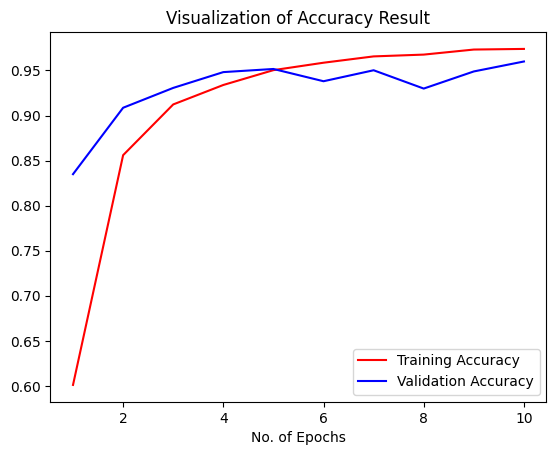

In [17]:
# Visualize Accuracy
epochs = [i for i in range(1, 11)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()


In [18]:
# Testing with the test set
test_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [19]:
y_pred = alexnet.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step


In [23]:
# Get the true categories from the test set
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

# Confusion Matrix and Classification Report
cm = confusion_matrix(Y_true, predicted_categories)
print(cm)

# Precision, Recall, F1-Score
print(classification_report(Y_true, predicted_categories, target_names=validation_set.class_names))

# Visualizing Confusion Matrix
plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, annot_kws={"size": 10})

plt.xlabel('Predicted Class', fontsize=20)
plt.ylabel('Actual Class', fontsize=20)
plt.title('Plant Disease Prediction Confusion Matrix', fontsize=25)
plt.show()

NameError: name 'confusion_matrix' is not defined